In [54]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('EVChargingStationUsage.csv')
df.head()

C:\Users\thesh\AppData\Local\Temp\ipykernel_17984\100100954.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


Scatter Plots


C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


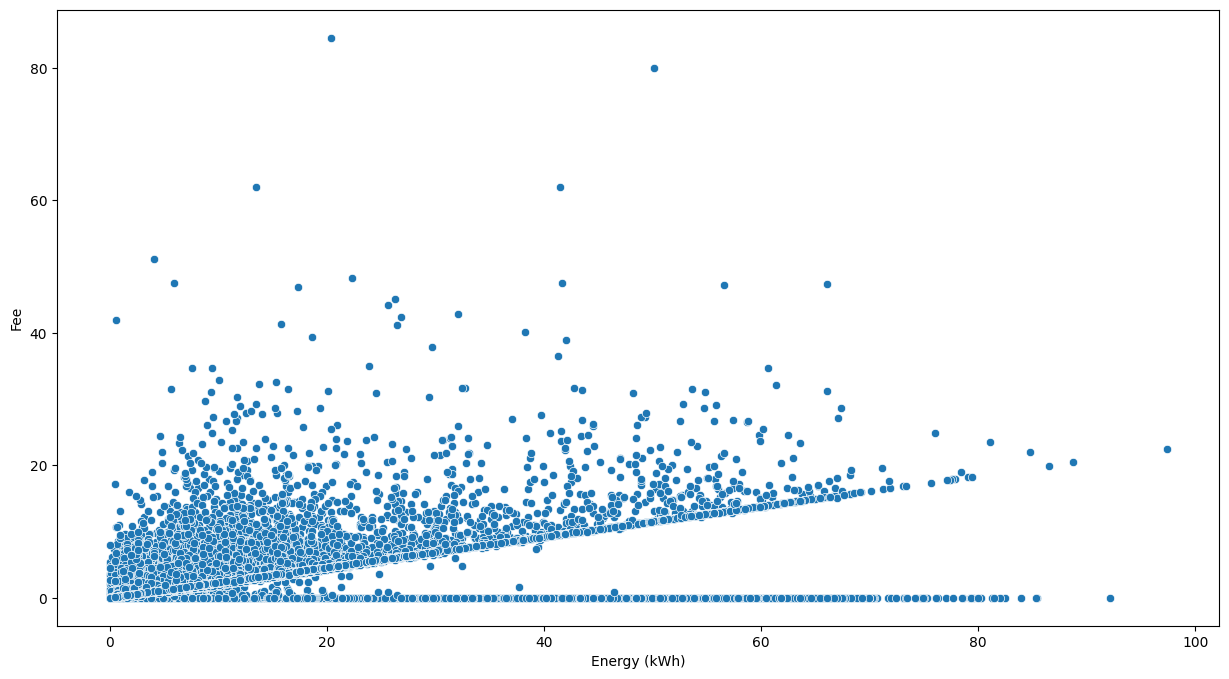

In [60]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y=df["Fee"], x=df["Energy (kWh)"])

From above plot we can identify positive corelation between Energy(KWh) and Fee. And we can also see some outliers.Also we can see that there many stations which are charging for free.


In [63]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

Data Preprocessing


Removing unnecessary columns


In [65]:
df.drop(columns=['Org Name','Transaction Date (Pacific Time)','City','State/Province','Country','Driver Postal Code','System S/N','County','Ended By','Currency','End Time Zone','Start Time Zone','Plug In Event Id'], inplace=True)

In [66]:
df.shape

(259415, 20)

In [67]:
df.isnull().sum()

Station Name                      0
MAC Address                       0
Start Date                        0
End Date                          0
Total Duration (hh:mm:ss)         0
Charging Time (hh:mm:ss)          0
Energy (kWh)                      0
GHG Savings (kg)                  0
Gasoline Savings (gallons)        0
Port Type                         9
Port Number                       0
Plug Type                         0
EVSE ID                       78948
Address 1                         0
Postal Code                       0
Latitude                          0
Longitude                         0
Fee                               0
User ID                        7677
Model Number                  78948
dtype: int64

In [68]:
df['Model Number']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
259410    CT4020-HD-GW
259411    CT4020-HD-GW
259412    CT4010-HD-GW
259413    CT4020-HD-GW
259414    CT4020-HD-GW
Name: Model Number, Length: 259415, dtype: object

In [69]:
df

,Station Name,MAC Address,Start Date,End Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,Postal Code,Latitude,Longitude,Fee,User ID,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,3284.0,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,4169.0,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,4169.0,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,2545.0,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,3765.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,12/31/2020 17:14,0:35:44,0:35:18,1.841000,0.773,0.231,Level 2,2,J1772,344261.0,275 Cambridge Ave,94306,37.428623,-122.144043,0.42,2024201,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,12/31/2020 20:31,3:43:01,2:14:04,12.744000,5.352,1.599,Level 2,2,J1772,104427.0,520 Webster St,94301,37.448284,-122.158272,4.69,242661,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,1/1/2021 10:56,17:28:14,5:08:12,29.665000,12.459,3.723,Level 2,1,J1772,2884001.0,3700 Middlefield Rd,94303,37.422104,-122.113510,6.82,449995,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,12/31/2020 21:55,4:05:34,3:53:42,11.976000,5.030,1.503,Level 2,1,J1772,104427.0,520 Webster St,94301,37.448284,-122.158272,2.75,804075,CT4020-HD-GW


In [70]:
df.isnull().sum()

Station Name                      0
MAC Address                       0
Start Date                        0
End Date                          0
Total Duration (hh:mm:ss)         0
Charging Time (hh:mm:ss)          0
Energy (kWh)                      0
GHG Savings (kg)                  0
Gasoline Savings (gallons)        0
Port Type                         9
Port Number                       0
Plug Type                         0
EVSE ID                       78948
Address 1                         0
Postal Code                       0
Latitude                          0
Longitude                         0
Fee                               0
User ID                        7677
Model Number                  78948
dtype: int64

In [71]:
df.fillna(0, inplace=True)

In [72]:
df['Model Number']

0                    0
1                    0
2                    0
3                    0
4                    0
              ...     
259410    CT4020-HD-GW
259411    CT4020-HD-GW
259412    CT4010-HD-GW
259413    CT4020-HD-GW
259414    CT4020-HD-GW
Name: Model Number, Length: 259415, dtype: object

In [73]:
df.isnull().sum()

Station Name                  0
MAC Address                   0
Start Date                    0
End Date                      0
Total Duration (hh:mm:ss)     0
Charging Time (hh:mm:ss)      0
Energy (kWh)                  0
GHG Savings (kg)              0
Gasoline Savings (gallons)    0
Port Type                     0
Port Number                   0
Plug Type                     0
EVSE ID                       0
Address 1                     0
Postal Code                   0
Latitude                      0
Longitude                     0
Fee                           0
User ID                       0
Model Number                  0
dtype: int64

In [74]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'User ID', 'Model Number'],
      dtype='object')

In [75]:
df['Postal Code'].value_counts()

Postal Code
94301    163195
94306     49630
94303     46590
Name: count, dtype: int64

In [76]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [77]:
le.fit(list(df['Station Name']))
df['Station_cat'] = df['Station Name'].apply(lambda x: le.transform([x])[0]+1)

In [78]:
df.shape

(259415, 21)

In [79]:
df['Station_cat'].unique()

array([13, 14, 18,  3,  2, 22, 24, 20, 19, 23, 21, 26, 25, 27, 45, 15, 46,
       41,  8,  4, 47,  9, 16, 17,  7,  5,  6, 44, 43, 12, 42, 10, 11,  1,
       37, 38, 40, 39, 35, 28, 34, 30, 33, 36, 31, 29, 32])

In [80]:
le.fit(list(df['MAC Address']))
df['MAC Address_cat'] = df['MAC Address'].apply(lambda x: le.transform([x])[0]+1)

In [81]:
df['MAC Address_cat'].unique()

array([26, 18,  5,  6,  4,  2,  8, 12,  7, 10,  9, 13,  3,  1, 11, 83, 82,
       81, 14, 16, 17, 20, 27, 36, 23, 21, 31, 34, 24, 25, 22, 28, 35, 19,
       41, 38, 40, 43, 42, 30, 29, 15, 48, 47, 39, 50, 51, 52, 33, 45, 46,
       32, 53, 44, 37, 57, 59, 55, 56, 54, 58, 60, 61, 62, 63, 77, 49, 78,
       79, 80, 67, 75, 74, 71, 70, 68, 66, 73, 76, 69, 65, 64, 72])

In [82]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'User ID', 'Model Number',
       'Station_cat', 'MAC Address_cat'],
      dtype='object')

In [83]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])

df['Total Duration (seconds)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds()
df['Total Duration (seconds)']

0         11012.0
1           126.0
2         15452.0
3          7404.0
4          4284.0
           ...   
259410     2144.0
259411    13381.0
259412    62894.0
259413    14734.0
259414     2527.0
Name: Total Duration (seconds), Length: 259415, dtype: float64

In [84]:
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])

df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds()
df['Charging Time (seconds)']


0          6843.0
1           114.0
2         15448.0
3          7378.0
4          2634.0
           ...   
259410     2118.0
259411     8044.0
259412    18492.0
259413    14022.0
259414     2504.0
Name: Charging Time (seconds), Length: 259415, dtype: float64

In [85]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'User ID', 'Model Number',
       'Station_cat', 'MAC Address_cat', 'Total Duration (seconds)',
       'Charging Time (seconds)'],
      dtype='object')

In [86]:
df['Total Duration (hours)'] = df['Total Duration (seconds)'] / 3600
df_cnt_h=df['Total Duration (hours)'].value_counts()
df_cnt_h

Total Duration (hours)
0.021389     36
1.492500     36
1.092778     36
1.347500     36
0.019722     35
             ..
8.932222      1
8.062500      1
10.785000     1
6.768333      1
17.470556     1
Name: count, Length: 31025, dtype: int64

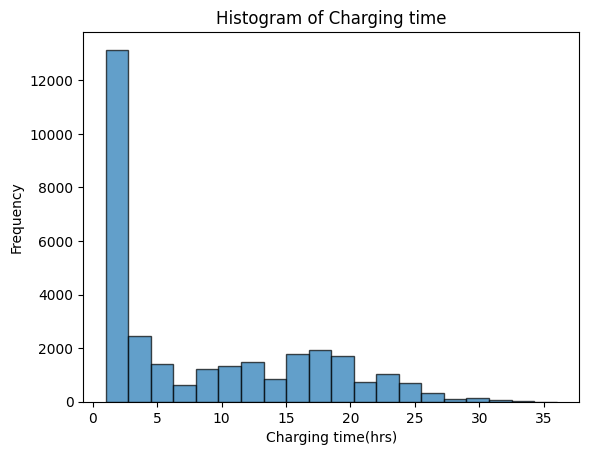

In [101]:
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Charging time(hrs)')
plt.ylabel('Frequency')
plt.title('Histogram of Charging time')
plt.show()


In [88]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'User ID', 'Model Number',
       'Station_cat', 'MAC Address_cat', 'Total Duration (seconds)',
       'Charging Time (seconds)', 'Total Duration (hours)'],
      dtype='object')

In [102]:
le.fit(list(df['Port Type']))
df['Port Type_cat'] = df['Port Type'].apply(lambda x: le.transform([x])[0]+1)

In [103]:
le.fit(list(df['Plug Type']))
df['Plug Type_cat'] = df['Plug Type'].apply(lambda x: le.transform([x])[0]+1)

In [91]:
df1=df['EVSE ID'].value_counts()
df1

EVSE ID
0.0          78948
109785.0     13826
104427.0     11074
109701.0      9665
106099.0      9349
107367.0      8677
109783.0      8350
174559.0      8317
107427.0      7695
104339.0      7571
174575.0      6930
6859.0        6040
189855.0      5857
191815.0      5332
29153.0       5129
318651.0      4556
312051.0      4476
109973.0      4381
3792.0        4369
29573.0       4202
27313.0       4201
43583.0       4134
6907.0        4087
6626.0        3941
4318.0        3643
6123.0        3623
191779.0      3598
337571.0      3428
344261.0      2455
320531.0      2226
320381.0      2217
777561.0      2060
6860.0        1250
1849001.0     1038
27293.0        863
29543.0        786
29453.0        608
2884001.0      445
5358941.0       29
5526191.0        8
5526291.0        7
5526801.0        4
5535441.0        4
5526221.0        4
5526181.0        3
5526171.0        2
5526261.0        2
5526281.0        1
5526231.0        1
5526771.0        1
5526211.0        1
5526271.0        1
Name

In [92]:
df['EVSE ID'].unique()

array([0.000000e+00, 1.097010e+05, 1.074270e+05, 1.097850e+05,
       1.043390e+05, 6.859000e+03, 1.097830e+05, 3.792000e+03,
       1.060990e+05, 6.860000e+03, 1.073670e+05, 2.731300e+04,
       4.318000e+03, 2.915300e+04, 2.957300e+04, 6.907000e+03,
       6.626000e+03, 1.044270e+05, 4.358300e+04, 6.123000e+03,
       2.729300e+04, 2.954300e+04, 2.945300e+04, 1.745750e+05,
       1.745590e+05, 1.099730e+05, 1.898550e+05, 1.917790e+05,
       1.918150e+05, 3.205310e+05, 3.442610e+05, 3.186510e+05,
       3.203810e+05, 3.120510e+05, 3.375710e+05, 7.775610e+05,
       1.849001e+06, 2.884001e+06, 5.358941e+06, 5.526181e+06,
       5.526221e+06, 5.526771e+06, 5.526171e+06, 5.526801e+06,
       5.526291e+06, 5.526191e+06, 5.526261e+06, 5.535441e+06,
       5.526211e+06, 5.526281e+06, 5.526231e+06, 5.526271e+06])

C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='EVSE ID', ylabel='Station_cat'>

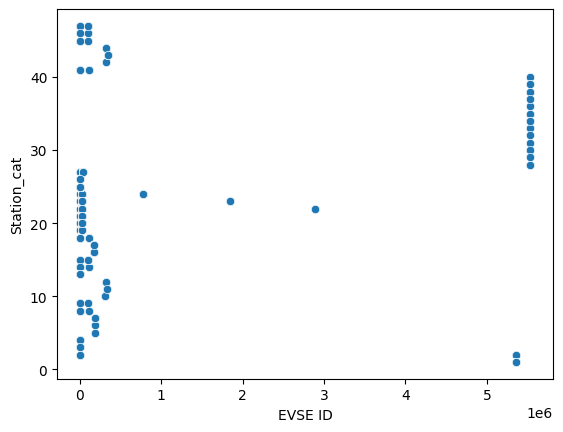

In [93]:
sns.scatterplot(x=df['EVSE ID'], y=df['Station_cat'])

In [94]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'User ID', 'Model Number',
       'Station_cat', 'MAC Address_cat', 'Total Duration (seconds)',
       'Charging Time (seconds)', 'Total Duration (hours)'],
      dtype='object')

C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

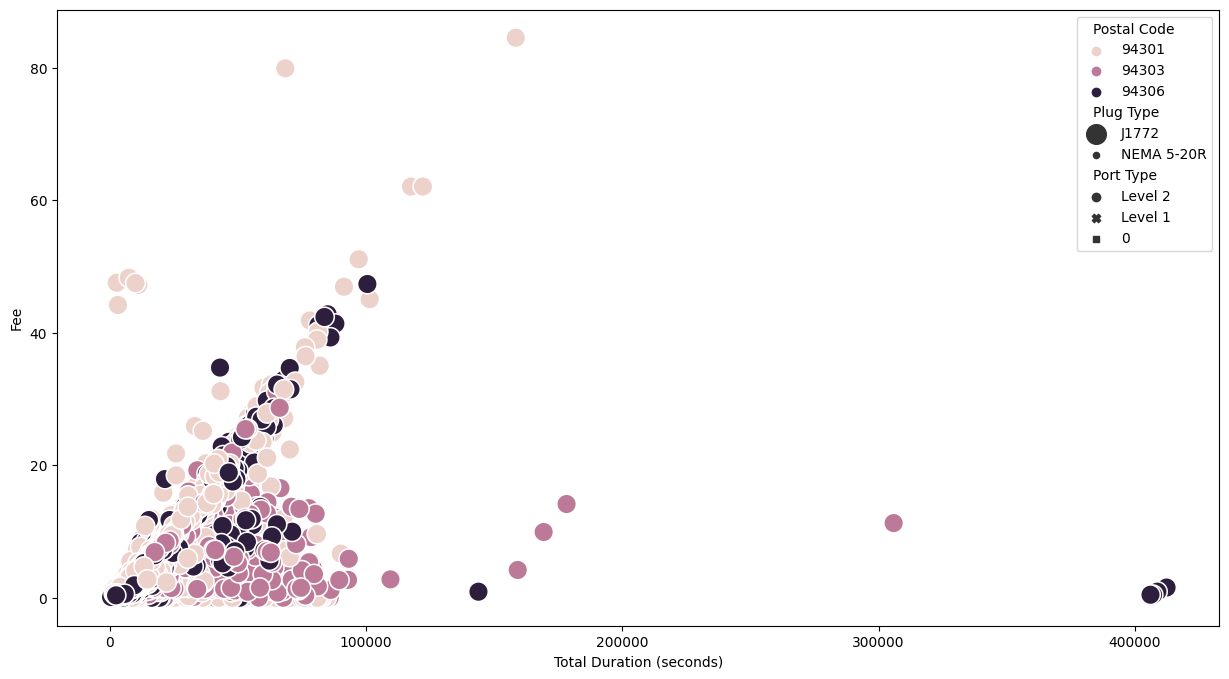

In [95]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Total Duration (seconds)"], y=df["Fee"], hue=df["Postal Code"], size=df["Plug Type"], style=df["Port Type"], sizes=(20, 200), legend="full")

We can see from above that at charging stations which are located 94301 postal code has less duration than 94303 and 94306.
And mostly J1772 plug type is used

C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


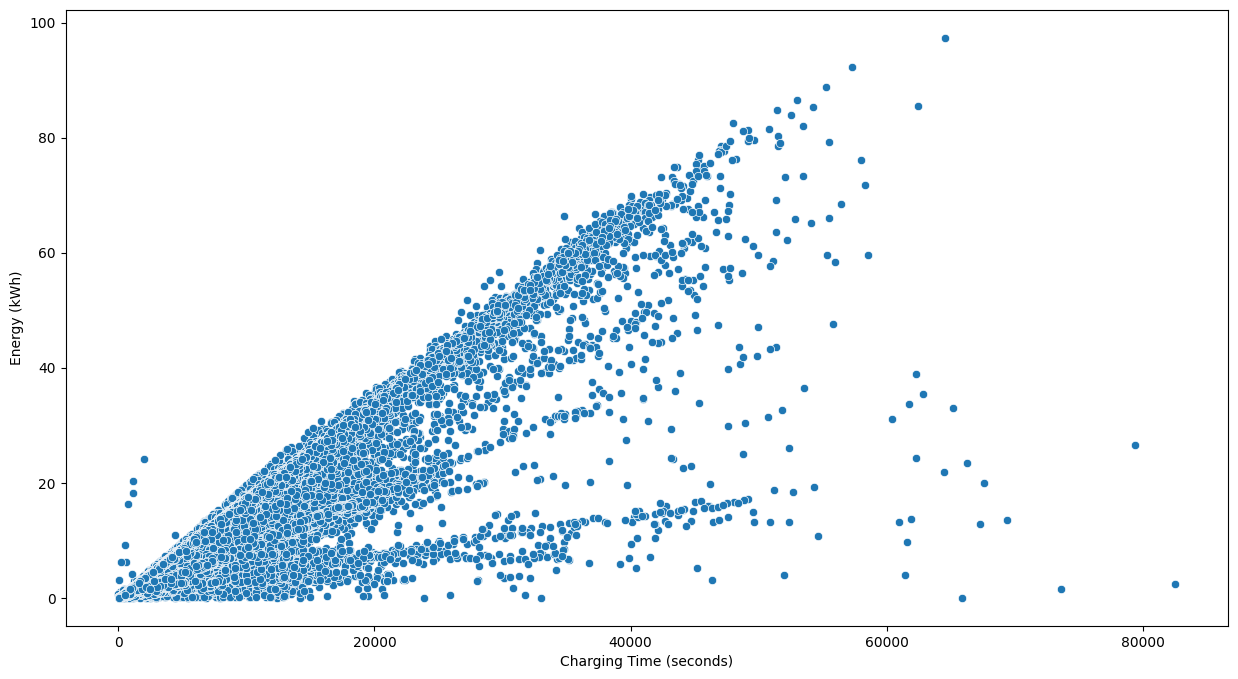

In [96]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Charging Time (seconds)"], y=df["Energy (kWh)"])


C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

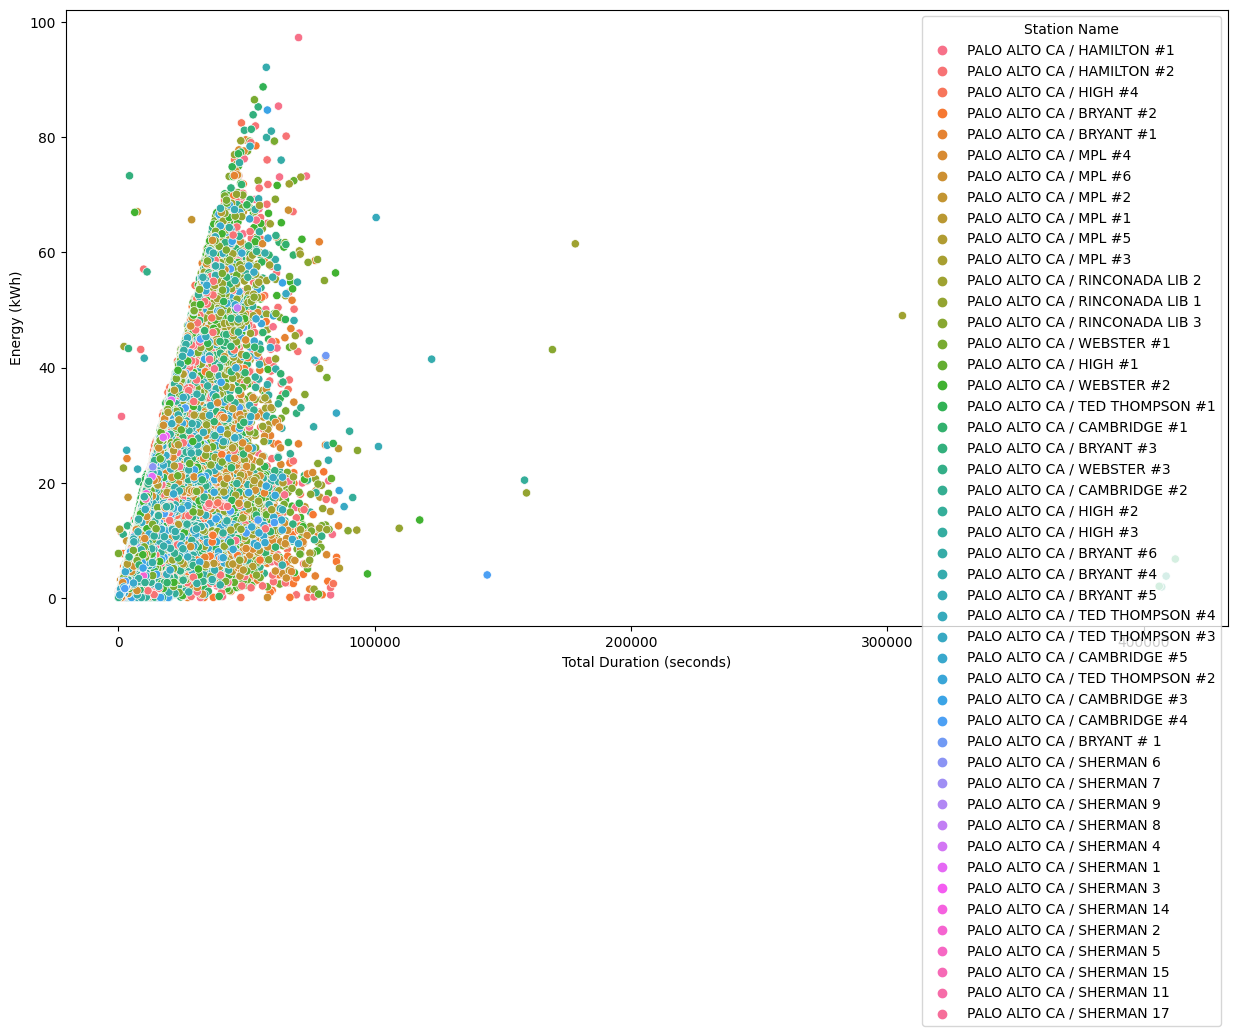

In [97]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Total Duration (seconds)"], y=df["Energy (kWh)"], hue=df["Station Name"], legend="full")

C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


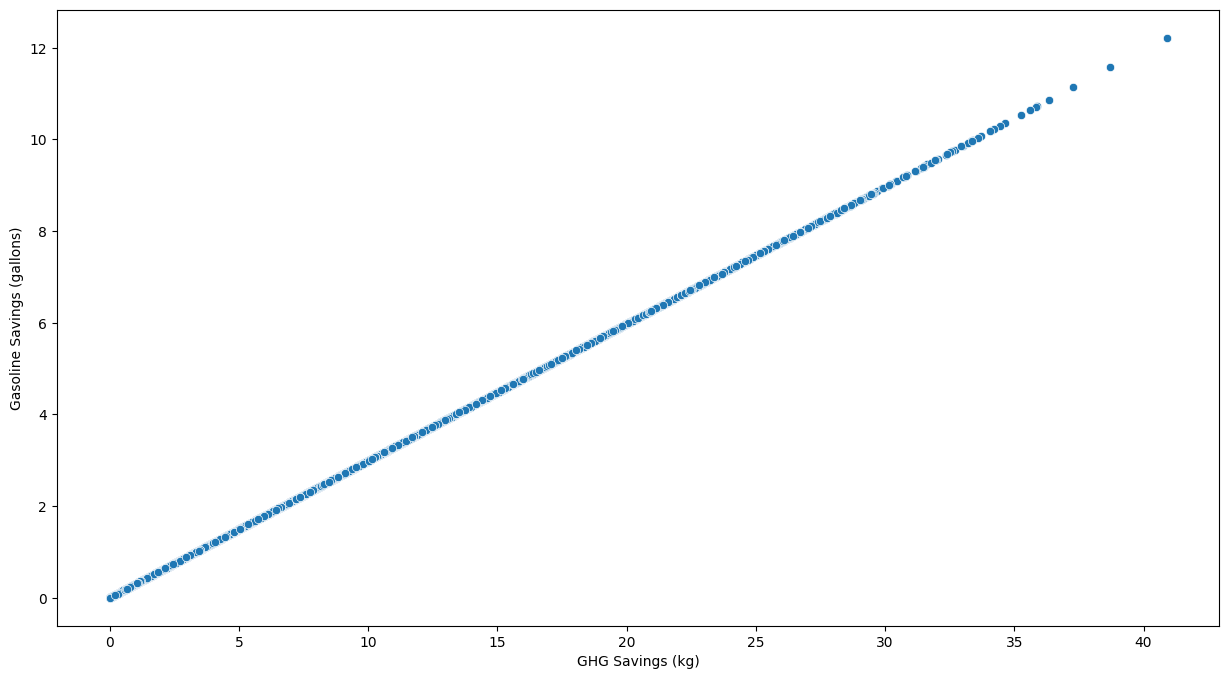

In [98]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["GHG Savings (kg)"], y=df["Gasoline Savings (gallons)"])

In [104]:
df.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'User ID', 'Model Number',
       'Station_cat', 'MAC Address_cat', 'Total Duration (seconds)',
       'Charging Time (seconds)', 'Total Duration (hours)', 'Port Type_cat',
       'Plug Type_cat'],
      dtype='object')

Data Normalization and Standardization

In [105]:
data_df=df[["Station_cat","EVSE ID","Port Type_cat","Plug Type_cat","Port Number","Energy (kWh)"]]


In [108]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Fee"], random_state=42, test_size=0.20)
size_scaler = preprocessing.StandardScaler().fit(X_train)

In [109]:
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)



In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [114]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [115]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.613521831905262 {}
RandomForestRegressor 1.258514145980861 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 1.3001133733859398 {'learning_rate': 0.01, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=710, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


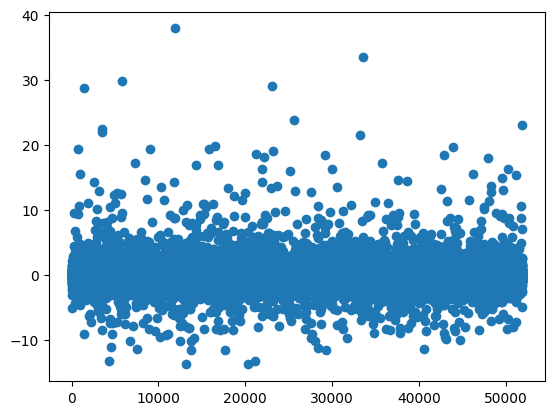

In [116]:
model_results = eval_models()

In [117]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,1.613522,1.572685,1.006581,1.007755,{}
RandomForestRegressor,1.258514,1.285833,0.589191,0.605159,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,1.300113,1.271869,0.592787,0.601571,"{'learning_rate': 0.01, 'n_estimators': 710}"
